# **IRIS Flower Classification**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns

**1.Reading Data**

In [2]:
data=pd.read_csv("IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species']=data['species'].str.replace('Iris-','')
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**2.Data Visualization**

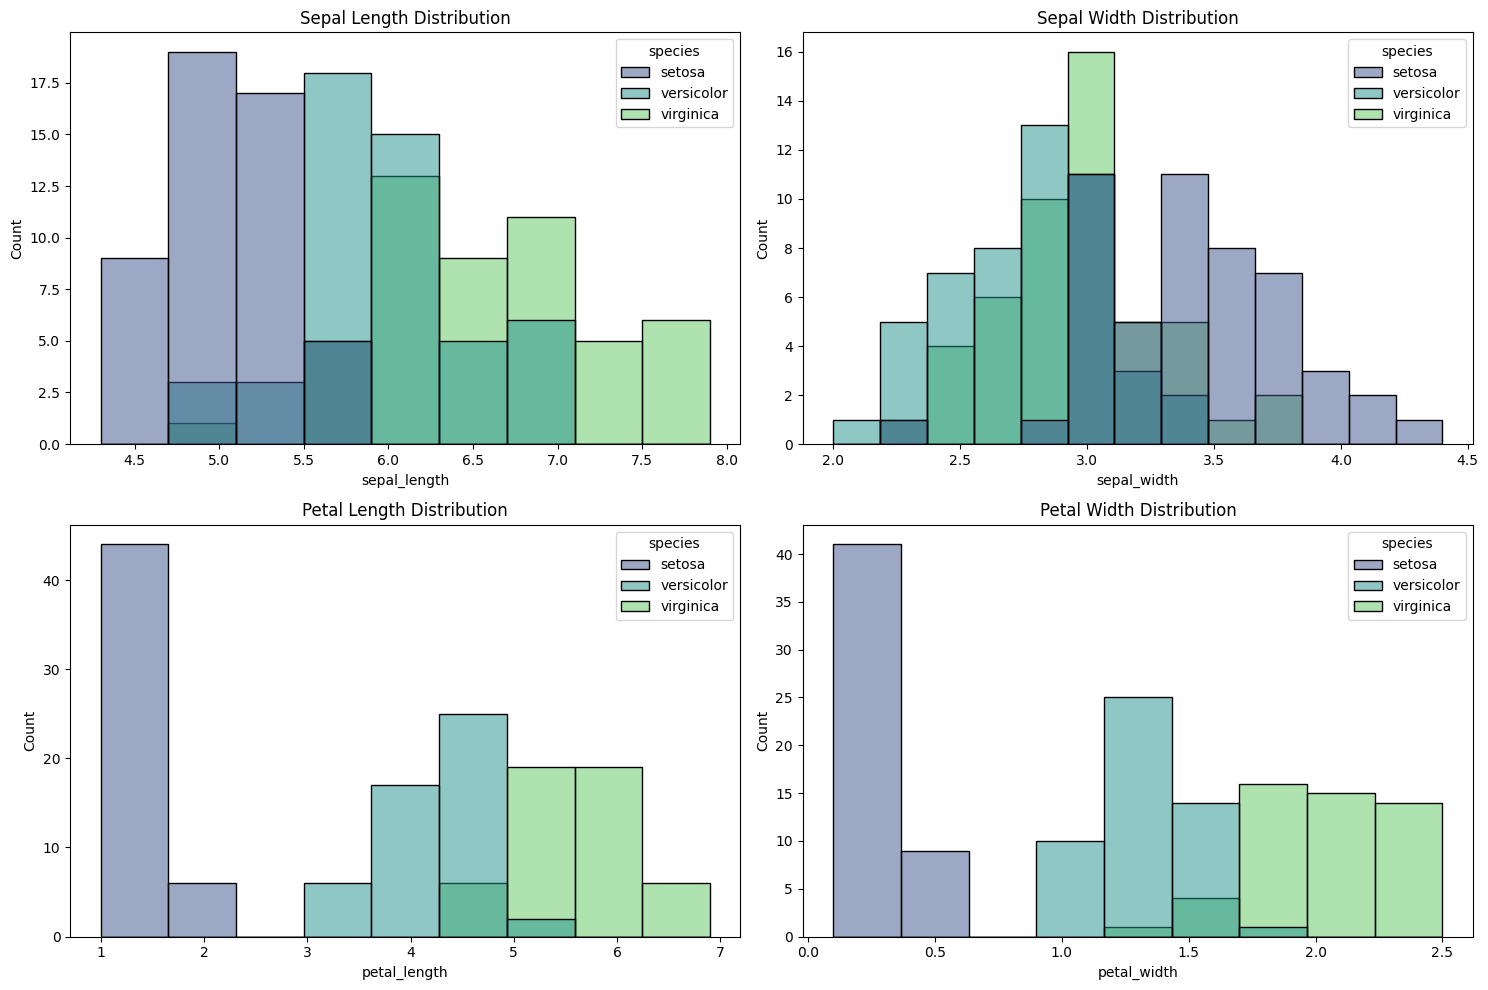

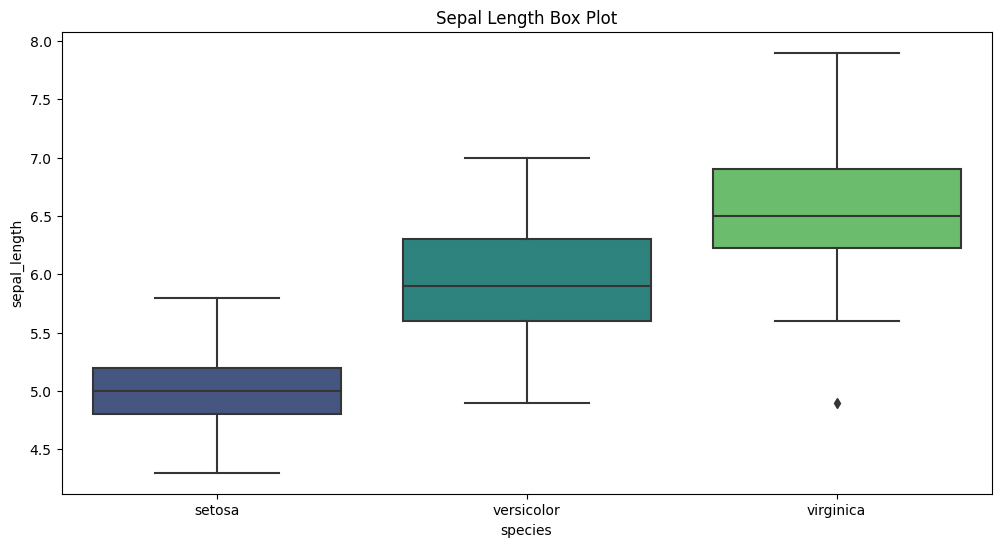

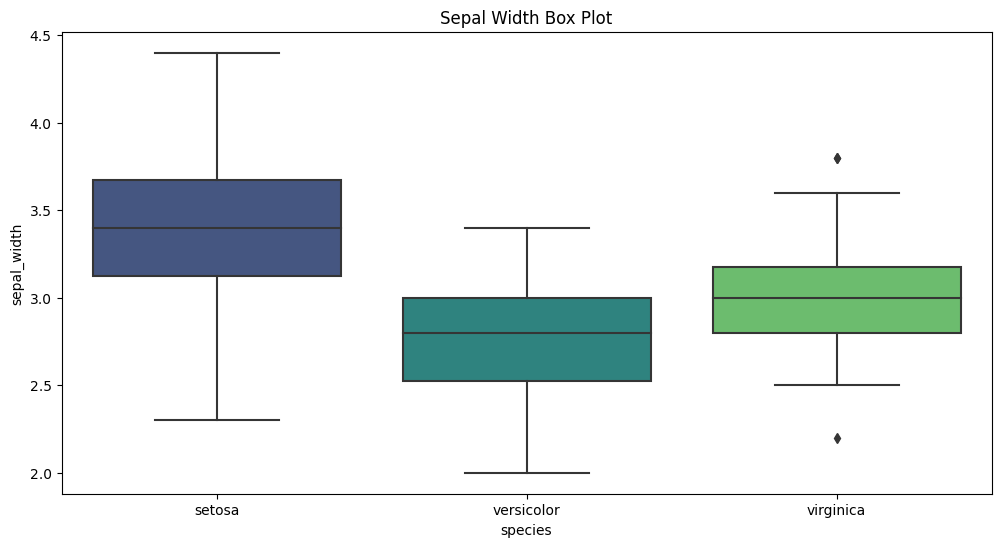

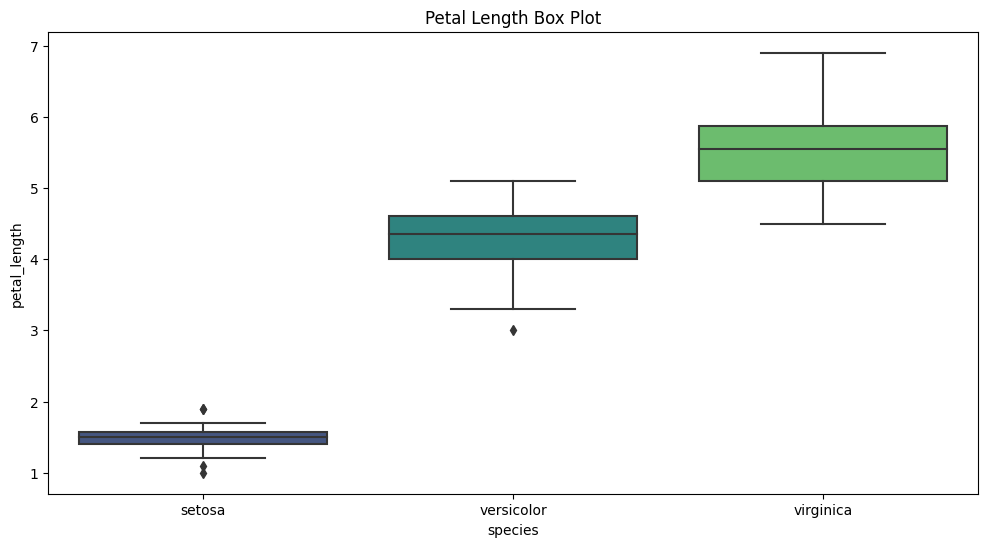

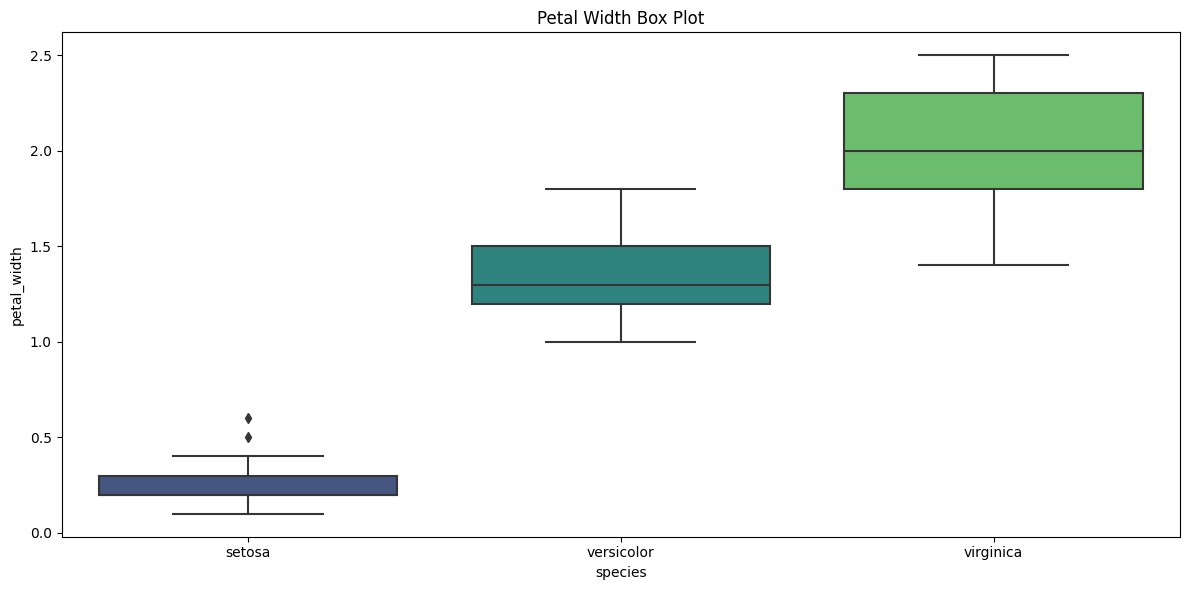

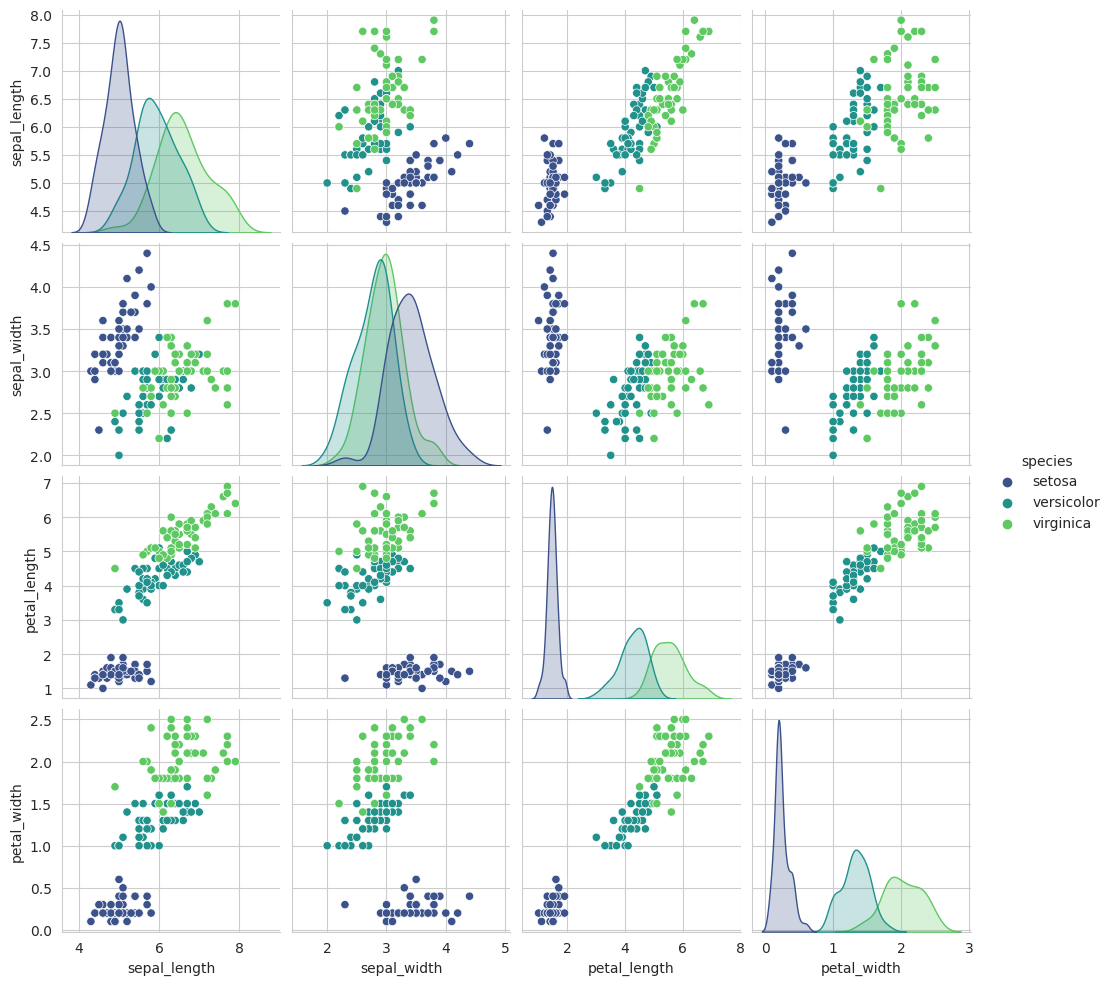

In [7]:
palette="viridis"
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(data,x="sepal_length",hue='species',palette=palette)
plt.title("Sepal Length Distribution")

plt.subplot(2,2,2)
sns.histplot(data,x="sepal_width",hue="species",palette=palette)
plt.title("Sepal Width Distribution")

plt.subplot(2,2,3)
sns.histplot(data,x="petal_length",hue='species',palette=palette)
plt.title("Petal Length Distribution")

plt.subplot(2,2,4)
sns.histplot(data,x="petal_width",hue="species",palette=palette)
plt.title("Petal Width Distribution")

plt.tight_layout()


plt.figure(figsize=(12,6))

sns.boxplot(data,x='species',y="sepal_length",palette=palette)
plt.title("Sepal Length Box Plot")

plt.figure(figsize=(12,6))
sns.boxplot(data,x='species',y="sepal_width",palette=palette)
plt.title("Sepal Width Box Plot")

plt.figure(figsize=(12,6))
sns.boxplot(data,x='species',y="petal_length",palette=palette)
plt.title("Petal Length Box Plot")

plt.figure(figsize=(12,6))
sns.boxplot(data,x='species',y="petal_width",palette=palette)
plt.title("Petal Width Box Plot")

plt.tight_layout()

sns.set_style('whitegrid')
sns.pairplot(data,hue='species',palette=palette)
plt.show()

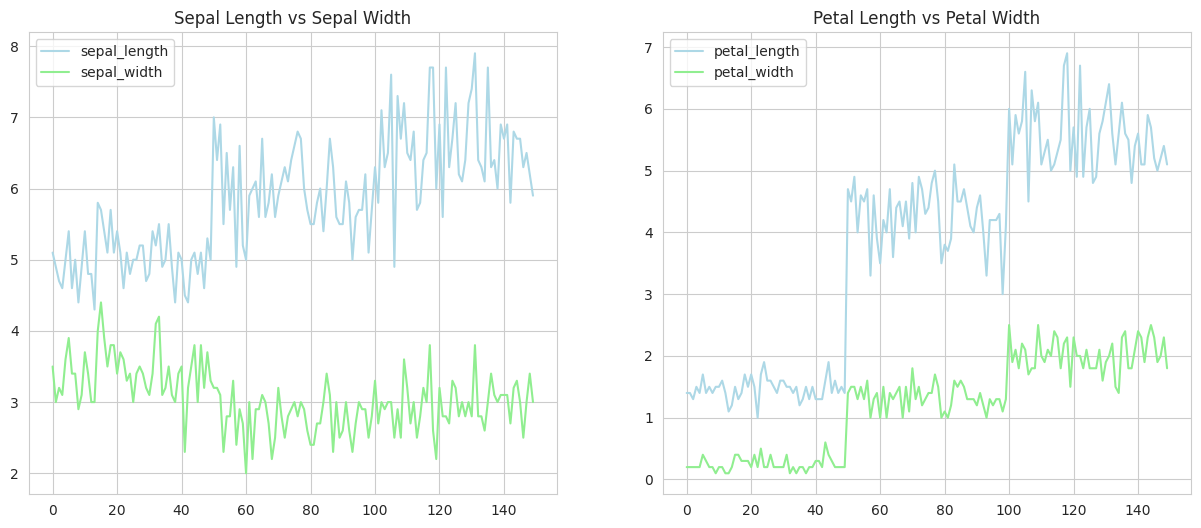

In [8]:
fig, ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(data["sepal_length"],label="sepal_length",color="lightblue")
ax[0].plot(data["sepal_width"],label="sepal_width",color="lightgreen")
ax[0].set_title("Sepal Length vs Sepal Width")
ax[0].legend()

ax[1].plot(data["petal_length"],label="petal_length",color="lightblue")
ax[1].plot(data["petal_width"],label="petal_width",color="lightgreen")
ax[1].set_title("Petal Length vs Petal Width")
ax[1].legend()

plt.show()

In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

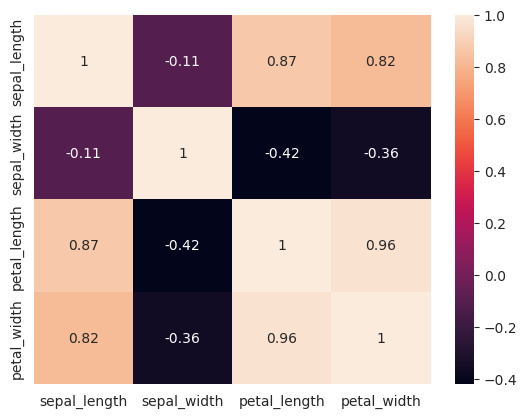

In [10]:
df=data.drop(['species'],axis=1)
sns.heatmap(df.corr(),annot=True)
plt.show()

**3.Modelling**

In [11]:

from sklearn.preprocessing import LabelEncoder
lE=LabelEncoder()

data['species']=lE.fit_transform(data['species'])
data['species'].unique()

array([0, 1, 2])

In [12]:
X=data.drop(['species'],axis=1)
Y=data['species']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

clf=DecisionTreeClassifier()

clf.fit(X_train,Y_train)

pred=clf.predict(X_test)

accuracy=accuracy_score(Y_test,pred)
report=classification_report(Y_test,pred)

print(f"Accuracy:{accuracy}")
print("\nClassfication Report:\n",report)

Accuracy:0.9666666666666667

Classfication Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

